# Lesson 0047 - Art Generation Generative Adversarial Networks
In this lesson, we adapt the code from [lesson_0046](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0046_mnist_generative_adversarial_networks.ipynb) to create art like in [lesson_0042](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0042_art_generation.ipynb).<br>
Therefore, we steal code from both lessons.

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [3]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


In [4]:
import keras
from keras import models
from keras import layers
from keras import backend as K
from keras.preprocessing.image import img_to_array as ita

print( keras.__version__ )

2.2.4


Using TensorFlow backend.


In [5]:
from PIL import Image

print( Image.__version__ )

5.4.1


In [6]:
Image.MAX_IMAGE_PIXELS = None

Image.LOAD_TRUNCATED_IMAGES = True

In [7]:
import os

In [8]:
folder = 'C:\\Users\\rhopi\\OneDrive\\Desktop\\python dev\\github\\lesson_0042\\train_1\\'



number_of_images = 0



for img in os.listdir( folder ):
    
    number_of_images = number_of_images + 1
    
    
    
print( number_of_images )

2008


In [9]:


train = np.zeros( shape = [ 2008, 50, 50, 3 ], dtype = np.float32 )




i = 0




for img in os.listdir( folder ):
    
    path_img = folder + img
    
    current = Image.open( path_img )
    
    
    
    
    width, height = current.size
    
    
    
    
    if width > height:
        
        width_new = 50
        
        height_new = np.int( np.float( height ) / np.float( width ) * 50 )
        
    else:
        
        height_new = 50
        
        width_new = np.int( np.float( width ) / np.float( height ) * 50 )
        
        
    
    
    current = current.resize( ( width_new, height_new ), resample = Image.BILINEAR )
    
    
    
    
    insert = ita( current )
    
    
    
    
    train[ i, 0 : height_new, 0 : width_new, : ] = insert[ :, :, 0 : 3 ]
    
    
    
    
    i = i + 1
    
    current.close()

In [10]:
mu = np.mean( train )

std = np.std( train )



train = ( train - mu ) / std

In [11]:
critic_input = keras.engine.input_layer.Input( shape = ( 50, 50, 3, ) )

critic_layer1 = layers.Conv2D( 64, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 2, 
                              padding = "SAME" )( critic_input )

critic_layer2 = layers.Dropout( 0.4 )( critic_layer1 )

critic_layer3 = layers.Conv2D( 128, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 2, 
                              padding = "SAME" )( critic_layer2 )

critic_layer4 = layers.Dropout( 0.4 )( critic_layer3 )

critic_layer5 = layers.Flatten()( critic_layer4 )

critic_layer6 = layers.Dense( 1 )( critic_layer5 )





critic = keras.Model( critic_input, critic_layer6 )

critic.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)  

C:\Users\rhopi\Anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [12]:
def wasserstein( y_true, y_pred ):
    
    return K.mean( y_true * y_pred )

In [13]:
critic.compile( optimizer = keras.optimizers.SGD( lr = 0.00005, momentum = 0, decay = 0,nesterov = False ), 
               loss = wasserstein, metrics = None )

In [14]:
creator_input = keras.engine.input_layer.Input( shape = ( 100, ) )

creator_layer1 = layers.Dense( 25 * 25 * 64 )( creator_input )

creator_layer2 = layers.BatchNormalization()( creator_layer1 )

creator_layer3 = layers.LeakyReLU()( creator_layer2 )

creator_layer4 = layers.Reshape( ( 25, 25, 64 ) )( creator_layer3 )

creator_layer5 = layers.UpSampling2D()( creator_layer4 )

creator_layer6 = layers.Conv2D( 128, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 1, 
                              padding = "SAME" )( creator_layer5 )

creator_layer7 = layers.BatchNormalization()( creator_layer6 )

creator_layer8 = layers.LeakyReLU()( creator_layer7 )

creator_layer9 = layers.Conv2D( 64, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 1, 
                              padding = "SAME" )( creator_layer8 )

creator_layer10 = layers.BatchNormalization()( creator_layer9 )

creator_layer11 = layers.LeakyReLU()( creator_layer10 )

creator_layer12 = layers.Conv2D( 64, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 1, 
                              padding = "SAME" )( creator_layer11 )

creator_layer13 = layers.BatchNormalization()( creator_layer12 )

creator_layer14 = layers.LeakyReLU()( creator_layer13 )

creator_layer15 = layers.Conv2D( 3, 5, activation = layers.LeakyReLU( alpha = 0.3 ), strides = 1, 
                              padding = "SAME" )( creator_layer14 )




creator = keras.Model( creator_input, creator_layer15 )

creator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40000)             4040000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 40000)             160000    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 40000)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 25, 25, 64)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       204928    
__________

In [15]:
critic.trainable = False

creator_trainer = keras.Model( creator_input, critic( creator( creator_input ) ) )

creator_trainer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_2 (Model)              (None, 50, 50, 3)         4718083   
_________________________________________________________________
model_1 (Model)              (None, 1)                 231425    
Total params: 4,949,508
Trainable params: 4,637,571
Non-trainable params: 311,937
_________________________________________________________________


In [16]:
creator_trainer.compile( optimizer = keras.optimizers.SGD( lr = 0.0001, momentum = 0, decay = 0,nesterov = False ), 
               loss = wasserstein, metrics = None )

In [17]:
def train_creator():
    
    valid = np.zeros( [ 100 ] ) + 1.0
    
    noise = np.random.normal( 0, 1, ( 100, 100 ) )
    
    loss = creator_trainer.train_on_batch( noise, valid )
    
    return loss

In [18]:


def train_critic():
    
    valid = np.zeros( [ 100 ] ) + 1.0
    
    random_integers = np.random.choice( range( 2008 ), 100, replace = False )
    
    true_images = train[ random_integers, :, :, : ]
    
    
    
    loss_real = critic.train_on_batch( true_images, valid )

    
    
    
    invalid = np.zeros( [ 100 ] ) - 1.0
    
    noise = np.random.normal( 0, 1, ( 100, 100 ) )
    
    

    
    loss_fake = critic.train_on_batch( creator.predict( noise ), invalid )
    
    
    
    
    for l in critic.layers:
        
        weights = l.get_weights()
        
        weights = [ np.clip( w, -0.01, 0.01 ) for w in weights ]
        
        l.set_weights( weights )
        
    return loss_real, loss_fake

In [19]:
loss_creator = []

loss_critic_real = []

loss_critic_fake = []

loss_critic_combined = []





for i in range( 100000 ):
    
    critic.trainable = True
    
    train_critic()
    
    train_critic()
    
    train_critic()
    
    train_critic()
    
    loss = train_critic()
    
    
    
    
    critic.trainable = False
    
    loss_critic_real.append( loss[ 0 ] )
    
    loss_critic_fake.append( loss[ 1 ] )
    
    loss_critic_combined.append( ( loss[ 0 ] + loss[ 1 ] ) / 2.0 )
    
    
    
    
    loss = train_creator()
    
    
    
    
    loss_creator.append( loss )

Instructions for updating:
Use tf.cast instead.


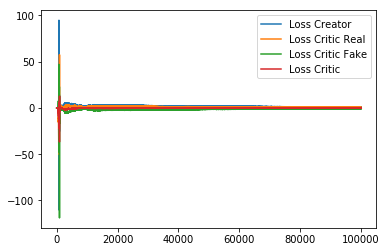

In [20]:
plt.plot( loss_creator, label = "Loss Creator" )

plt.plot( loss_critic_real, label = "Loss Critic Real" )

plt.plot( loss_critic_fake, label = "Loss Critic Fake" )

plt.plot( loss_critic_combined, label = "Loss Critic" )

plt.legend( loc = "best" )

([], <a list of 0 Text yticklabel objects>)

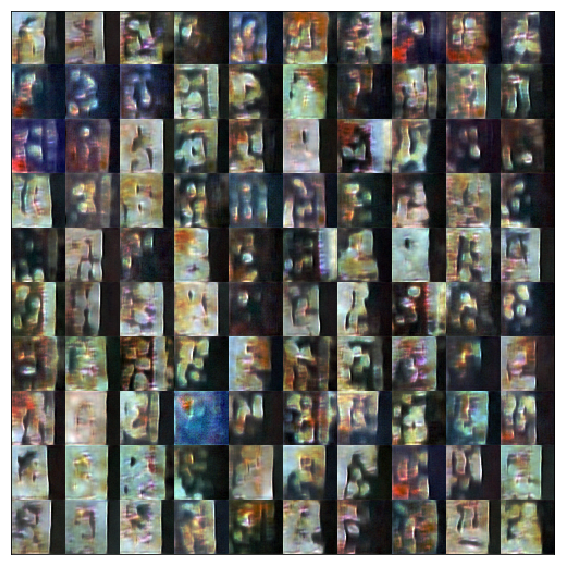

In [21]:
mat = np.zeros( shape = [ 500, 500, 3 ] )



for i in range( 10 ):
    
    for j in range( 10 ):
        
        x_d = i * 50
        
        x_u = 50 + i * 50
        
        y_l = j * 50
        
        y_r = 50 + j * 50
        
        pred = creator.predict( np.random.normal( 0, 1, ( 1, 100 ) ) )[ 0, :, :, : ]
        
        pred[ :, :, 0 ] = pred[ :, :, 0 ] - np.min( pred[ :, :, 0 ] )
        
        pred[ :, :, 0 ] = pred[ :, :, 0 ] / np.max( pred[ :, :, 0 ] )
        
        pred[ :, :, 1 ] = pred[ :, :, 1 ] - np.min( pred[ :, :, 1 ] )
        
        pred[ :, :, 1 ] = pred[ :, :, 1 ] / np.max( pred[ :, :, 1 ] )
        
        pred[ :, :, 2 ] = pred[ :, :, 2 ] - np.min( pred[ :, :, 2 ] )
        
        pred[ :, :, 2 ] = pred[ :, :, 2 ] / np.max( pred[ :, :, 2 ] )
        
        mat[ x_d : x_u, y_l : y_r, : ] = pred
        

        
plt.figure( 1, figsize = ( 10, 10 ) )
        
plt.imshow( mat )

plt.xticks( [ ] )

plt.yticks( [ ] )